In [7]:
import pandas as pd
import altair as alt
import numpy as np
alt.data_transformers.enable('json')
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [2]:
df = pd.read_csv('data/ant_joint_locations.csv', comment='#')
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood
0,0,dalotia,0,head,73.086,193.835,1.0
1,1,dalotia,0,head,73.730,194.385,1.0
2,2,dalotia,0,head,75.673,195.182,1.0
3,3,dalotia,0,head,77.319,196.582,1.0
4,4,dalotia,0,head,78.128,197.891,1.0


In [3]:
df['x_coord (mm)'] = df['x_coord'] * 0.08 # mm / pixel
df['y_coord (mm)'] = df['y_coord'] * 0.08 
df.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x_coord (mm),y_coord (mm)
0,0,dalotia,0,head,73.086,193.835,1.0,5.84688,15.50680
1,1,dalotia,0,head,73.730,194.385,1.0,5.89840,15.55080
2,2,dalotia,0,head,75.673,195.182,1.0,6.05384,15.61456
3,3,dalotia,0,head,77.319,196.582,1.0,6.18552,15.72656
4,4,dalotia,0,head,78.128,197.891,1.0,6.25024,15.83128


In [4]:
# all the inds
dalotia = df['beetle_treatment'] == 'dalotia'
sceptobius = df['beetle_treatment'] == 'sceptobius'
thorax = df['bodypart'] == 'thorax'

# Boolean slicing
df_dalo_thor = df.loc[dalotia & thorax, :]
df_scepto_thor = df.loc[sceptobius & thorax, :]

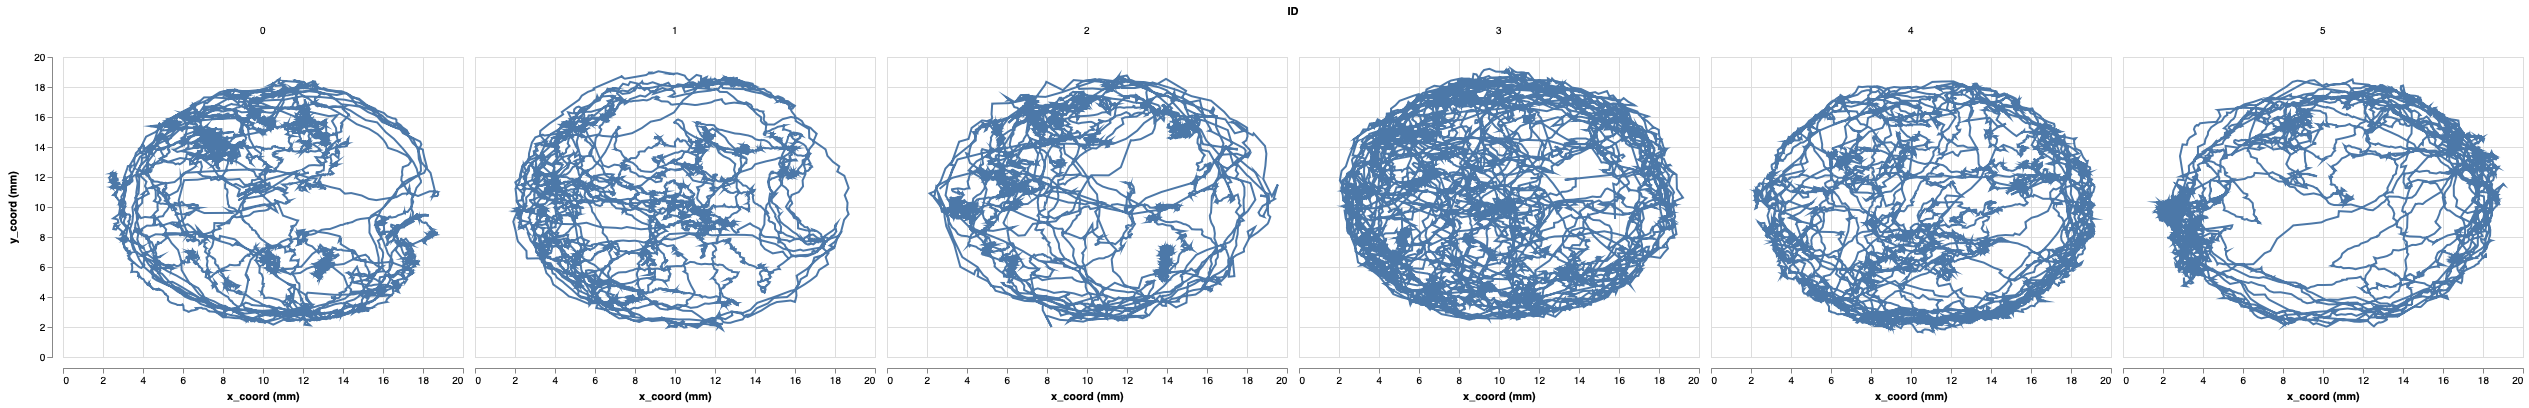

In [8]:
dalotia_thorax = alt.Chart(df_dalo_thor
    ).mark_line(
    ).encode(x='x_coord (mm)',
             y='y_coord (mm)',
             order=alt.Order('frame:Q', sort='ascending')
    ).facet(column='ID:O')

dalotia_thorax

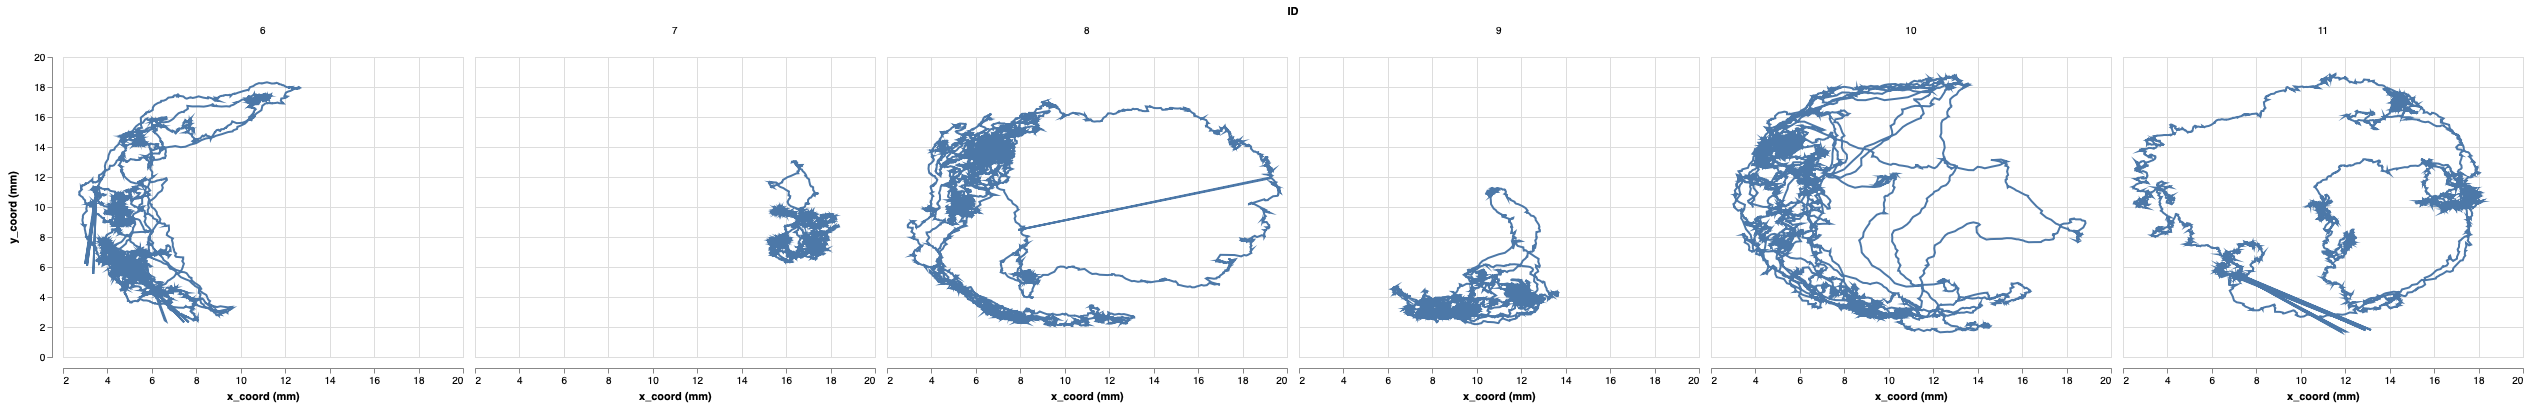

In [17]:
sceptobius_thorax = alt.Chart(df_scepto_thor
    ).mark_line(
    ).encode(x='x_coord (mm)',
             y='y_coord (mm)',
             order=alt.Order('frame:Q', sort='ascending')
    ).facet(column='ID:O')

sceptobius_thorax

In [11]:
# Whatsup with the straight lines?
# inds
ID8 = df_scepto_thor['ID'] == 8
ID11 = df_scepto_thor['ID'] == 11

df_scepto_thor_8 = df_scepto_thor.loc[ID8, :]
df_scepto_thor_11 = df_scepto_thor.loc[ID11, :]

df_scepto_thor_8.head()

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x_coord (mm),y_coord (mm)
409959,0,sceptobius,8,thorax,55.559,177.279,1.0,4.44472,14.18232
409960,1,sceptobius,8,thorax,55.554,177.391,1.0,4.44432,14.19128
409961,2,sceptobius,8,thorax,55.544,177.443,1.0,4.44352,14.19544
409962,3,sceptobius,8,thorax,55.542,177.570,1.0,4.44336,14.20560
409963,4,sceptobius,8,thorax,55.600,177.315,1.0,4.44800,14.18520


In [15]:
# Data validation
# Check if all frames are unique entries
print(df_scepto_thor_8['frame'].is_unique)
print(df_scepto_thor_11['frame'].is_unique)

True
True


In [52]:
# Check what the biggest jump is between frames
def max_interframe_diff(df, frame_name, x_coord_name, y_coord_name):
    maxx = 0
    framex = 0
    maxy = 0
    framey = 0
    for frame in range(df[frame_name].max()-1):
        x_diff = np.abs(df.loc[df[frame_name] == frame+1, x_coord_name].values - df.loc[df[frame_name] == frame, x_coord_name].values)
        y_diff = np.abs(df.loc[df[frame_name] == frame+1, y_coord_name].values - df.loc[df[frame_name] == frame, y_coord_name].values)
        if x_diff > maxx:
            maxx = x_diff
            framex = frame
        if y_diff > maxy:
            maxy = y_diff
            framey = frame
    print(' Frame for max x jump: {0} \n Max x jump: {1:2f} \n Frame for max y jump: {2} \n Max y jump: {3:2f}'.format(framex, float(maxx), framey, float(maxy)))
#   print('Frame for max x jump: '+str(framex)+'\n'+
#           'Max x jump: '+str(float(maxx))+'\n'+
#           'Frame for max y jump: '+str(framey)+'\n'+
#           'Max y jump: '+str(float(maxy)))

In [53]:
max_interframe_diff(df_scepto_thor_8, 'frame', 'x_coord (mm)', 'y_coord (mm)')

 Frame for max x jump: 7792 
 Max x jump: 11.395200 
 Frame for max y jump: 7791 
 Max y jump: 3.497600


In [43]:
df_scepto_thor_8.loc[((df_scepto_thor_8['frame'] > 7789) & (df_scepto_thor_8['frame'] < 7795))]

,frame,beetle_treatment,ID,bodypart,x_coord,y_coord,likelihood,x_coord (mm),y_coord (mm)
417749,7790,sceptobius,8,thorax,240.890,149.454,1.0,19.27120,11.95632
417750,7791,sceptobius,8,thorax,240.601,149.618,1.0,19.24808,11.96944
417751,7792,sceptobius,8,thorax,98.825,105.898,1.0,7.90600,8.47184
417752,7793,sceptobius,8,thorax,241.265,149.150,1.0,19.30120,11.93200
417753,7794,sceptobius,8,thorax,241.936,148.168,1.0,19.35488,11.85344


In [8]:
slider = alt.binding_range(min=0, max=5, step=1)
select_ID = alt.selection_single(name="ID", fields=['ID'], bind=slider)

dalotia_thorax = alt.Chart(df_dalo_thor
    ).mark_line(
    ).encode(x='x_coord (mm)',
             y='y_coord (mm)',
             order=alt.Order('frame:Q', sort='ascending')
    ).add_selection(select_ID
    ).transform_filter(select_ID)

dalotia_thorax

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
